In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
(x_train , y_train) , (x_test , y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.3.0
Running on TPU  ['10.4.141.138:8470']
INFO:tensorflow:Initializing the TPU system: grpc://10.4.141.138:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.4.141.138:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


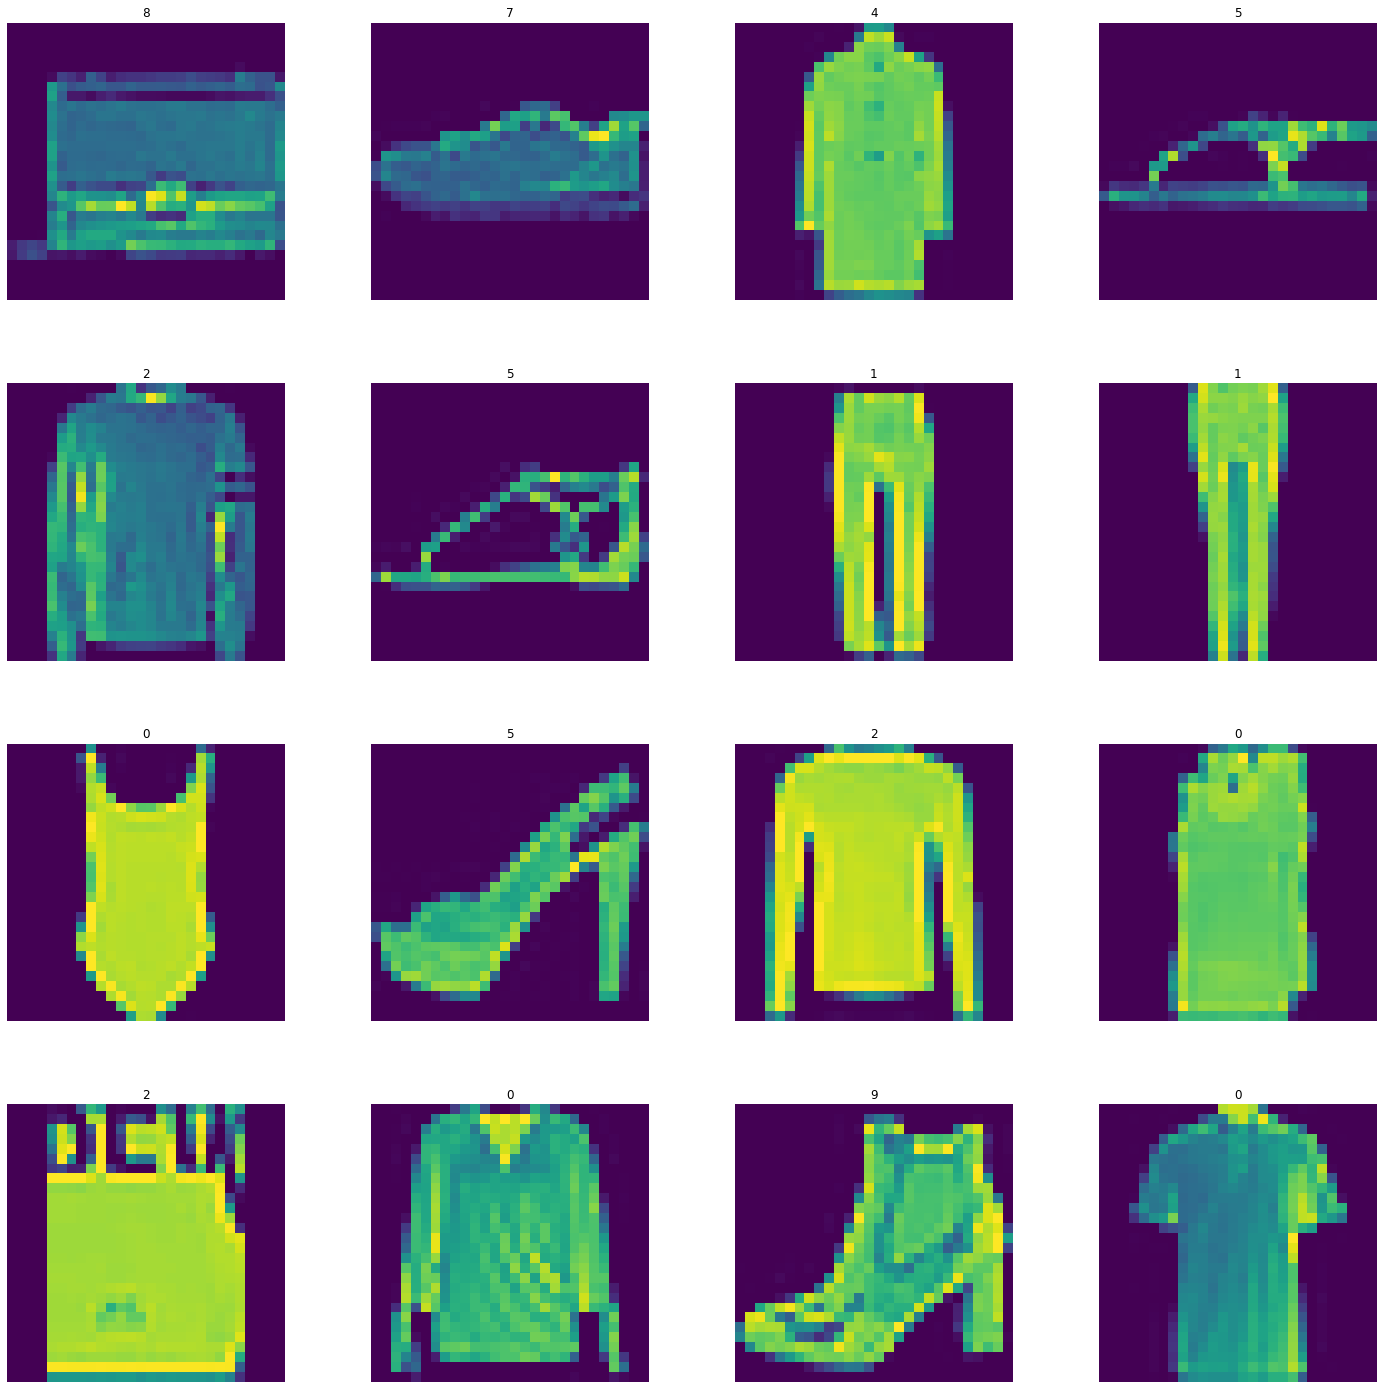

In [6]:
L_grid = 4
W_grid = 4

fig  ,axes = plt.subplots(L_grid , W_grid , figsize = (25,25))
axes = axes.ravel()

n_training = len(x_train)

import random

for i in range(0, L_grid*W_grid):
  index= random.randint(0 , n_training)
  axes[i].imshow(x_train[index])
  axes[i].set_title(y_train[index])
  axes[i].axis('off')

plt.subplots_adjust(hspace=0.3)

In [ ]:
# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

In [7]:
x_train = np.expand_dims(x_train , -1)
x_test = np.expand_dims(x_test , -1)

In [8]:
x_train.shape

(60000, 28, 28, 1)

In [9]:
x_test.shape

(10000, 28, 28, 1)

In [10]:
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

In [11]:
x_train = x_train/255
x_test = x_test/255

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten , Dense , Dropout

In [13]:
def create_model():
  classifier = Sequential()
  classifier.add(Conv2D(filters=64 , kernel_size=(3,3) , activation='relu' , input_shape = (28,28,1)))
  classifier.add(MaxPooling2D((2,2)))
  classifier.add(Dropout(rate = 0.2))
  classifier.add(Conv2D(filters=64 , kernel_size=(3,3) , activation='relu'))
  classifier.add(MaxPooling2D((2,2)))
  classifier.add(Dropout(0.2))
  classifier.add(Flatten())
  classifier.add(Dense(units=128 , activation='relu'))
  classifier.add(Dense(units=10 , activation='sigmoid'))
  return classifier

In [14]:
with tpu_strategy.scope():
  model = create_model()
  model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3, ),
      loss='sparse_categorical_crossentropy',
      metrics=['sparse_categorical_accuracy'])

In [17]:
model.fit(x_train.astype(np.float32) , y_train.astype(np.float32) , epochs=18 , batch_size=32 )

Epoch 1/18
   1/1875 [..............................] - ETA: 29:54 - loss: 0.4214 - sparse_categorical_accuracy: 0.8438WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0039s vs `on_train_batch_end` time: 0.0115s). Check your callbacks.


1875/1875 [==============================] - 27s 15ms/step - loss: 0.3619 - sparse_categorical_accuracy: 0.8675
Epoch 2/18
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2911 - sparse_categorical_accuracy: 0.8922
Epoch 3/18
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2594 - sparse_categorical_accuracy: 0.9031
Epoch 4/18
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2370 - sparse_categorical_accuracy: 0.9114
Epoch 5/18
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2223 - sparse_categorical_accuracy: 0.9165
Epoch 6/18
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2056 - sparse_categorical_accuracy: 0.9212
Epoch 7/18
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1952 - sparse_categorical_accuracy: 0.9256
Epoch 8/18
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1841 - sparse_categorical_accuracy: 0.9297
Epoch 9/18
1875/1875 [=====

In [18]:
y_pred = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [19]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


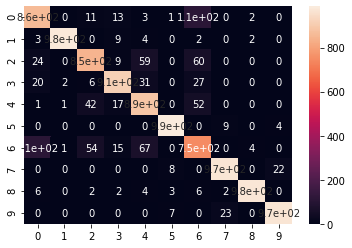

In [21]:
import seaborn as sns
sns.heatmap(cm  ,annot=True)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)

0.9142

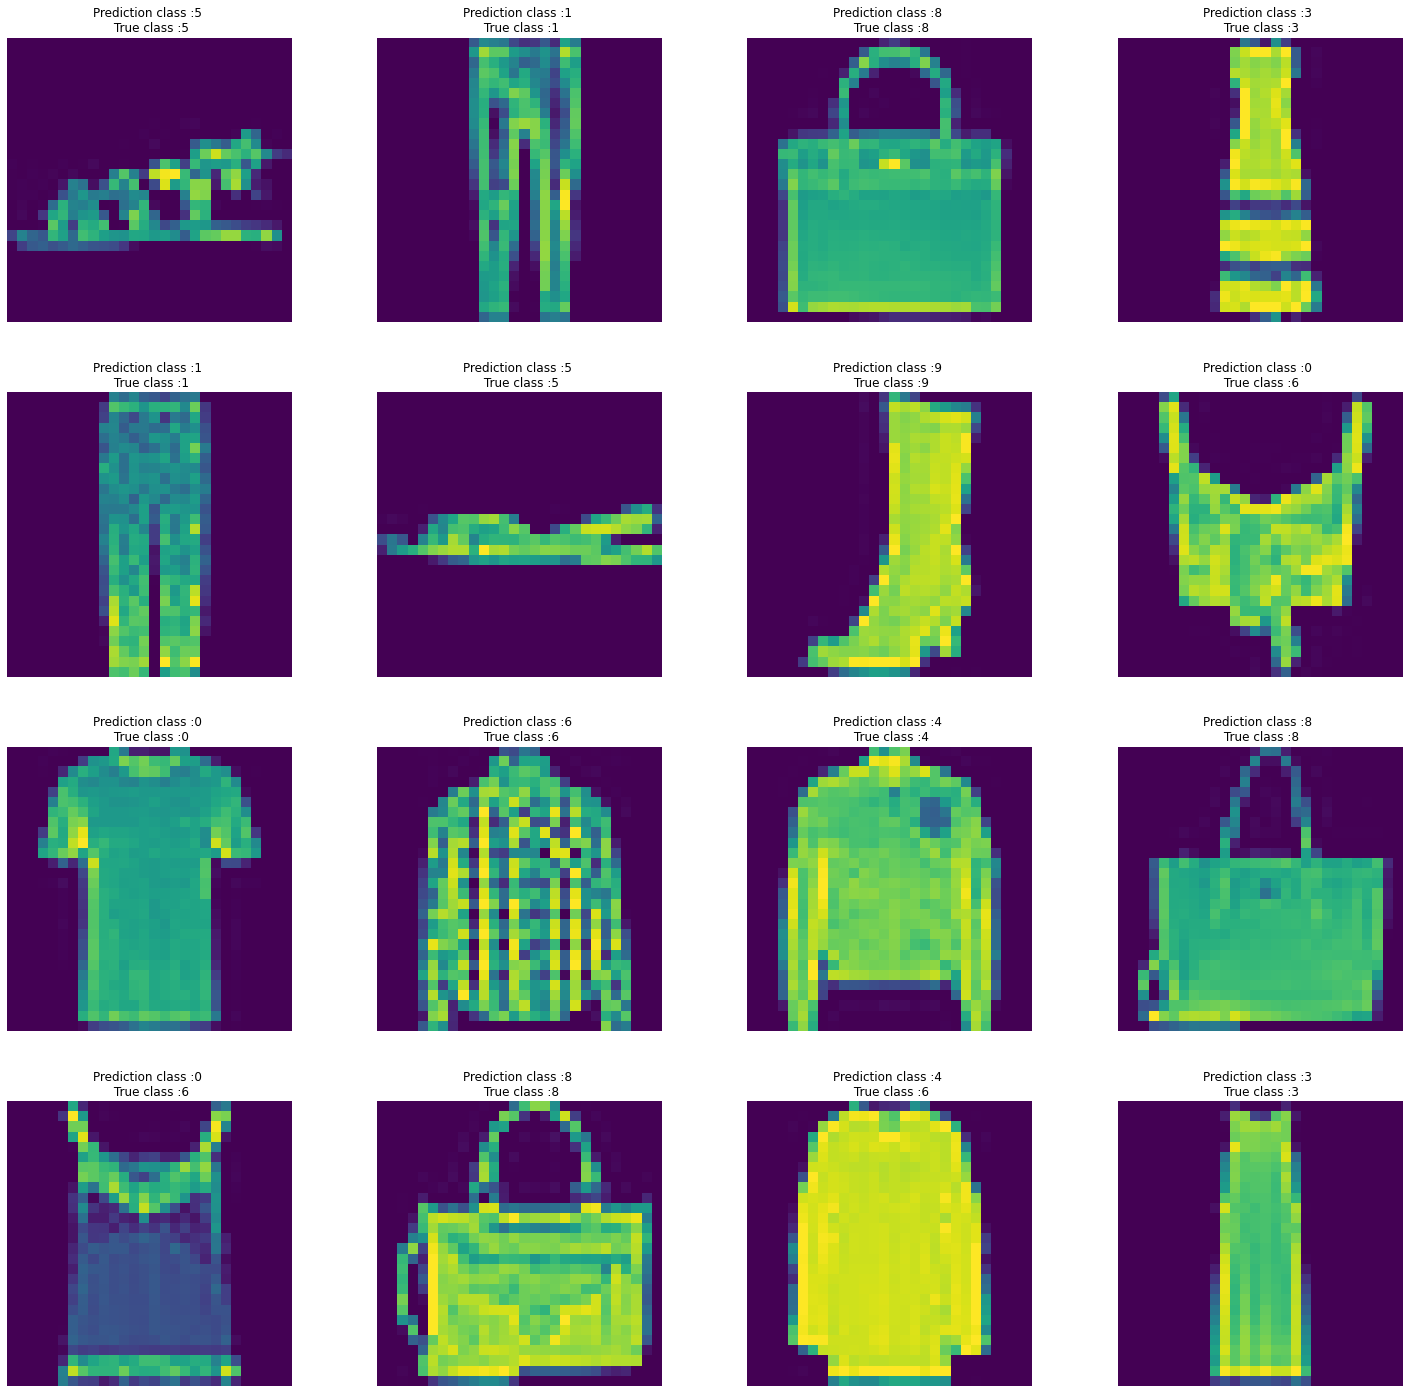

In [23]:
l = 4
w= 4

fig , axes = plt.subplots(l ,w ,figsize = (25,25))
axes = axes.ravel()

n_test = len(x_test)

for i in range(0 , l*w):
  index = random.randint(0 , n_test)
  axes[i].imshow(tf.squeeze(x_test[index]))
  axes[i].set_title('Prediction class :{} \n True class :{}'.format(y_pred[index] , y_test[index]))
  axes[i].axis('off')

plt.subplots_adjust(wspace=0.3)

In [24]:
#Thank you!!